# Teste Piloto

Foi utilizado o conjunto de dados "Bolsistas de Iniciação Científica" para fazer testes de limpeza e visualização de dados para averiguar o funcionamento do Jupyter e na montagem de estratégias que facilitem os próximos passos da Iniciação Científica.

# Importação de Bibliotecas

Algumas bibliotecas fazem parte da Ciência de Dados e é o primeiro passo para qualquer projeto. Logo:


In [190]:
#Importando bibliotecas para o Teste Piloto
import pandas as pd #biblioteca de dataframe 
%matplotlib inline 
import matplotlib.pyplot as plt #Para plotagem e confecção de gráficos
import random
import numpy as np

# Arquivo CSV

No Portal de Dados Abertos da UFOP, foi realizado download do conjunto de dados "Bolsista_IC" e foi armazenada em um diretório específico no desktop utilizado. Diante desse cenário:

In [191]:
path = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsistas_ic.csv" #Endereço do csv para leitura

In [192]:
df = pd.read_csv(path, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8


# Operações Básicas 

In [193]:
df.dropna(inplace = True) # Descartando colunas com valor nulo para evitar erros


In [194]:
df.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 1 to 3790
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bolsista        3581 non-null   object
 1   curso_bolsista  3581 non-null   object
 2   programa        3581 non-null   object
 3   ano             3581 non-null   int64 
 4   orientador      3581 non-null   object
 5   setor           3581 non-null   object
 6   linha_pesquisa  3581 non-null   object
 7   id_projeto      3581 non-null   int64 
 8   título          3581 non-null   object
 9   fomento         3581 non-null   object
 10  tipo_bolsa      3581 non-null   object
dtypes: int64(2), object(9)
memory usage: 335.7+ KB


Com a função info(), é possível saber número de linhas, número de colunas, tamanho de bytes e os tipos de dados envolvidos.
Certamente, é uma ótima função para análises mais profundas e fornece um start inicial em qualquer projeto em relação ao conhecimento de uma dataframe.

In [195]:
df.shape #Tamanho da base de dados: número de linhas e número de colunas

(3581, 11)

In [196]:
df.columns #Saber o nome das colunas

Index(['bolsista', 'curso_bolsista', 'programa', 'ano', 'orientador', 'setor',
       'linha_pesquisa', 'id_projeto', 'título', 'fomento', 'tipo_bolsa'],
      dtype='object')

In [197]:
df.describe() #Estatistica Geral do dataframe


,ano,id_projeto
count,3581.000000,3581.000000
mean,2019.195197,5478.063111
std,1.372572,1703.265563
min,2017.000000,2326.000000
25%,2018.000000,3981.000000
50%,2019.000000,5617.000000
75%,2020.000000,6948.000000
max,2021.000000,8503.000000


Com a função describe(), obtemos insights estratégicos e estatísticos de maneira geral e inicial para contextualizar possíveis análises que podem ser realizadas com uma determinada dataframe. 

In [198]:
df.tail() #Imprime as 5 ultimas linhas do Dataframe

,bolsista,curso_bolsista,programa,ano,orientador,setor,linha_pesquisa,id_projeto,título,fomento,tipo_bolsa
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,PROGRAMA INSTITUCIONAL DE BOLSAS DE INICIAÇÃO ...,2021,MARCO ANTONIO MELO FRANCO (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR EM DIFERENTES ESP...,7722,COVID-19 E ESCOLARIZAÇÃO: O QUE MUDA NO PROCES...,CNPQ,BOLSISTA
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR AS DIVERSAS PRÁTI...,7063,Contribuições da Metodologia de Produções Narr...,UFOP,BOLSISTA
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR AS DIVERSAS PRÁTI...,7063,Contribuições da Metodologia de Produções Narr...,UFOP,BOLSISTA
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,ANELISE FONSECA DUTRA (DELET),DELET,ESTA LINHA INCORPORA A LINGUÍSTICA APLICADA EM...,7045,Teletandem: o desenvolvimento da competência i...,UFOP,BOLSISTA
3790,ALICE SILVEIRA DA SILVA,LETRAS PORTUGUES,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,ANELISE FONSECA DUTRA (DELET),DELET,ESTA LINHA INCORPORA A LINGUÍSTICA APLICADA EM...,7045,Teletandem: o desenvolvimento da competência i...,UFOP,BOLSISTA


In [199]:
df['ano'].min() #menor data do dataframe

2017

In [200]:
df['ano'].max() #maior data do dataframe


2021

# Limpeza de Dados

O processo de limpeza de dados é crucial em projetos de Ciência e Análise de Dados, sendo um processo notório e importante para qualquer contexto. Logo, podemos analisar algumas medidas, entre elas:

In [201]:
df['tipo_bolsa'].replace("VOLUNTARIO", "VOLUNTÁRIO", inplace=True) # alterando valores da coluna

In [202]:
df.drop(['programa', 'linha_pesquisa', 'id_projeto', 'título'], axis=1, inplace=True) #removendo colunas que não serão usadas

In [203]:
df.columns = ['Bolsista','Curso','Ano','Orientador','Departamento','Fomento','Tipo de Aluno'] #Renomeando colunas

In [204]:
df['Tipo de Aluno'].value_counts(normalize=True) * 100 #porcentagem de alunos por tipo de bolsa

BOLSISTA      61.547054
VOLUNTÁRIO    38.452946
Name: Tipo de Aluno, dtype: float64

In [205]:
#Inserindo coluna para contagem para facilitar nas análises
df['Contagem'] = 1

In [206]:
df.drop(['Orientador'], axis=1, inplace=True) #Excluindo o campo Orientador

In [207]:
def categorizar_departamento(Departamento): #Função para categorizar os departamentos em Unidades
    if Departamento == "DEEGEP"or Departamento =="DEETE":
        return 'CEAD'
    elif Departamento == "DEENP" or Departamento =="DEELT" or Departamento =="DECSI" or Departamento =="DECEA":
        return 'ICEA'
    elif Departamento == "DECAD" or Departamento =="DECSO" or Departamento =="DEECO" or Departamento =="DEJOR" or Departamento =="DESSO":
        return 'ICSA'
    elif Departamento == "DEART" or Departamento =="DEFIL" or Departamento =="DEHIS" or Departamento =="DELET":
        return 'ICHS'
    elif Departamento == "DEDIR" or Departamento =="DEMUL" or Departamento =="DETUR":
        return 'EDTM'
    elif Departamento == "DEEFD":
        return 'EEF'
    elif Departamento == "DEACL" or Departamento =="DEFAR":
        return 'EFAR'
    elif Departamento == "DEAMB" or Departamento =="DEARQ" or Departamento =="DECAT" or Departamento =="DEMEC" or Departamento =="DECIV" or Departamento =="DEGEO" or Departamento =="DEMET" or Departamento =="DEMIN" or Departamento =="DEPRO" or Departamento =="DEURB":
        return 'EMINAS'
    elif Departamento == "DECPG" or Departamento =="DECPA" or Departamento =="DEMSC":
        return 'EMED'
    elif Departamento == "DEALI" or Departamento =="DENCS":
        return 'ENUT'
    elif Departamento == "DECOM" or Departamento =="DEFIS" or Departamento =="DEQUI" or Departamento =="DECBI" or Departamento =="DEBIO" or Departamento =="DEEMA" or Departamento =="DEEST" or Departamento =="DEMAT":
        return 'ICEB'
    else:
        return 'IFAC'

In [208]:
df['Unidade'] = df['Departamento'].apply(categorizar_departamento)

In [209]:
df

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Contagem,Unidade
1,ALINE TONHELA FERRAZ,FARMACIA,2017,DECBI,FAPEMIG,BOLSISTA,1,IFAC
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC
4,ANA CAROLINA DA SILVA,TURISMO,2017,DETUR,UFOP,VOLUNTÁRIO,1,IFAC
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,DECOM,UFOP,VOLUNTÁRIO,1,IFAC
...,...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,DEEDU,CNPQ,BOLSISTA,1,IFAC
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,DEEDU,UFOP,BOLSISTA,1,IFAC
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,2021,DEEDU,UFOP,BOLSISTA,1,IFAC
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS


# Visualização de Dados

A visualização de dados é outro processo crucial em Ciência de Dados e Análise de Dados em qualquer contexto, o objetivo desse processo é detalhar, mostrar, apresentar e organizar as informações que podem ser contidas ao analisar dados expostos de maneira fácil e interativa ao usuário.

In [210]:
#Cores para serem usadas nos gráficos
colors = [['#AFB0D4','#8589FB','#CFD1FA','#41437A','#A5A6C7'],
          ['#E2C5FD','#BC78FB','#DFC3FA','#5C3B7A','#B29BC7'],
          ['#AAFAC6','#5FFB96','#AAFAC6','#2F7A49','#87C79E']
         ]

# Questões Norteadoras

1. Quantos alunos são bolsistas e quantos alunos são voluntários nos projetos de Iniciação Científica?

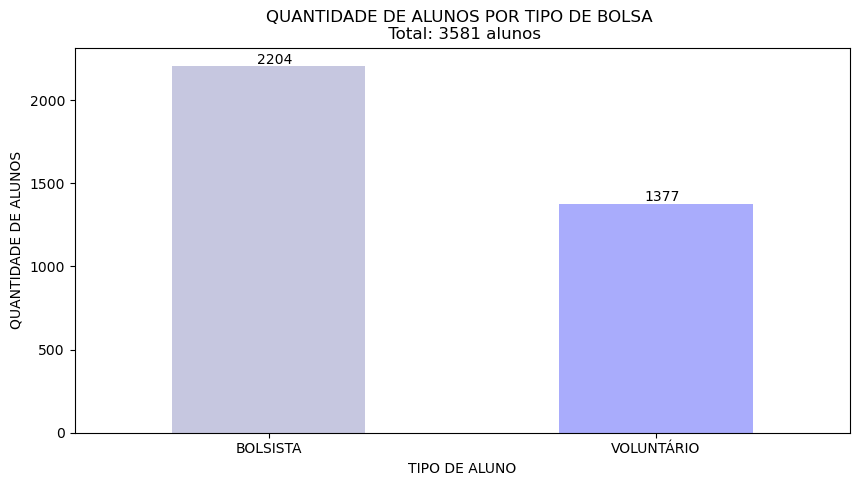

In [211]:
grafico = df.groupby('Tipo de Aluno')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico.patches:
    b=p.get_bbox()
    grafico.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('TIPO DE ALUNO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR TIPO DE BOLSA \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.show()

2. Quantos alunos de Iniciação Científica pertecem a uma determinada agência de fomento?

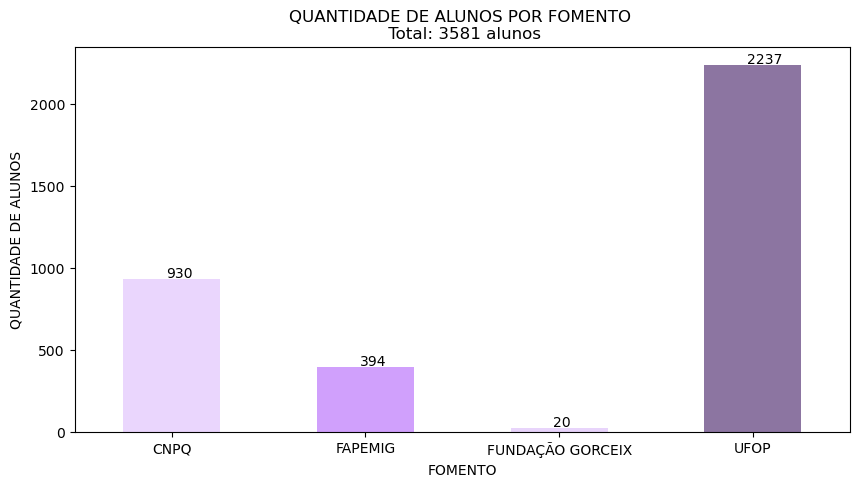

In [212]:
grafico = df.groupby('Fomento')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico.patches:
    b=p.get_bbox()
    grafico.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('FOMENTO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR FOMENTO \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.show()

3. Quantos alunos de Iniciação Científica pertecem a um determinado departamento?

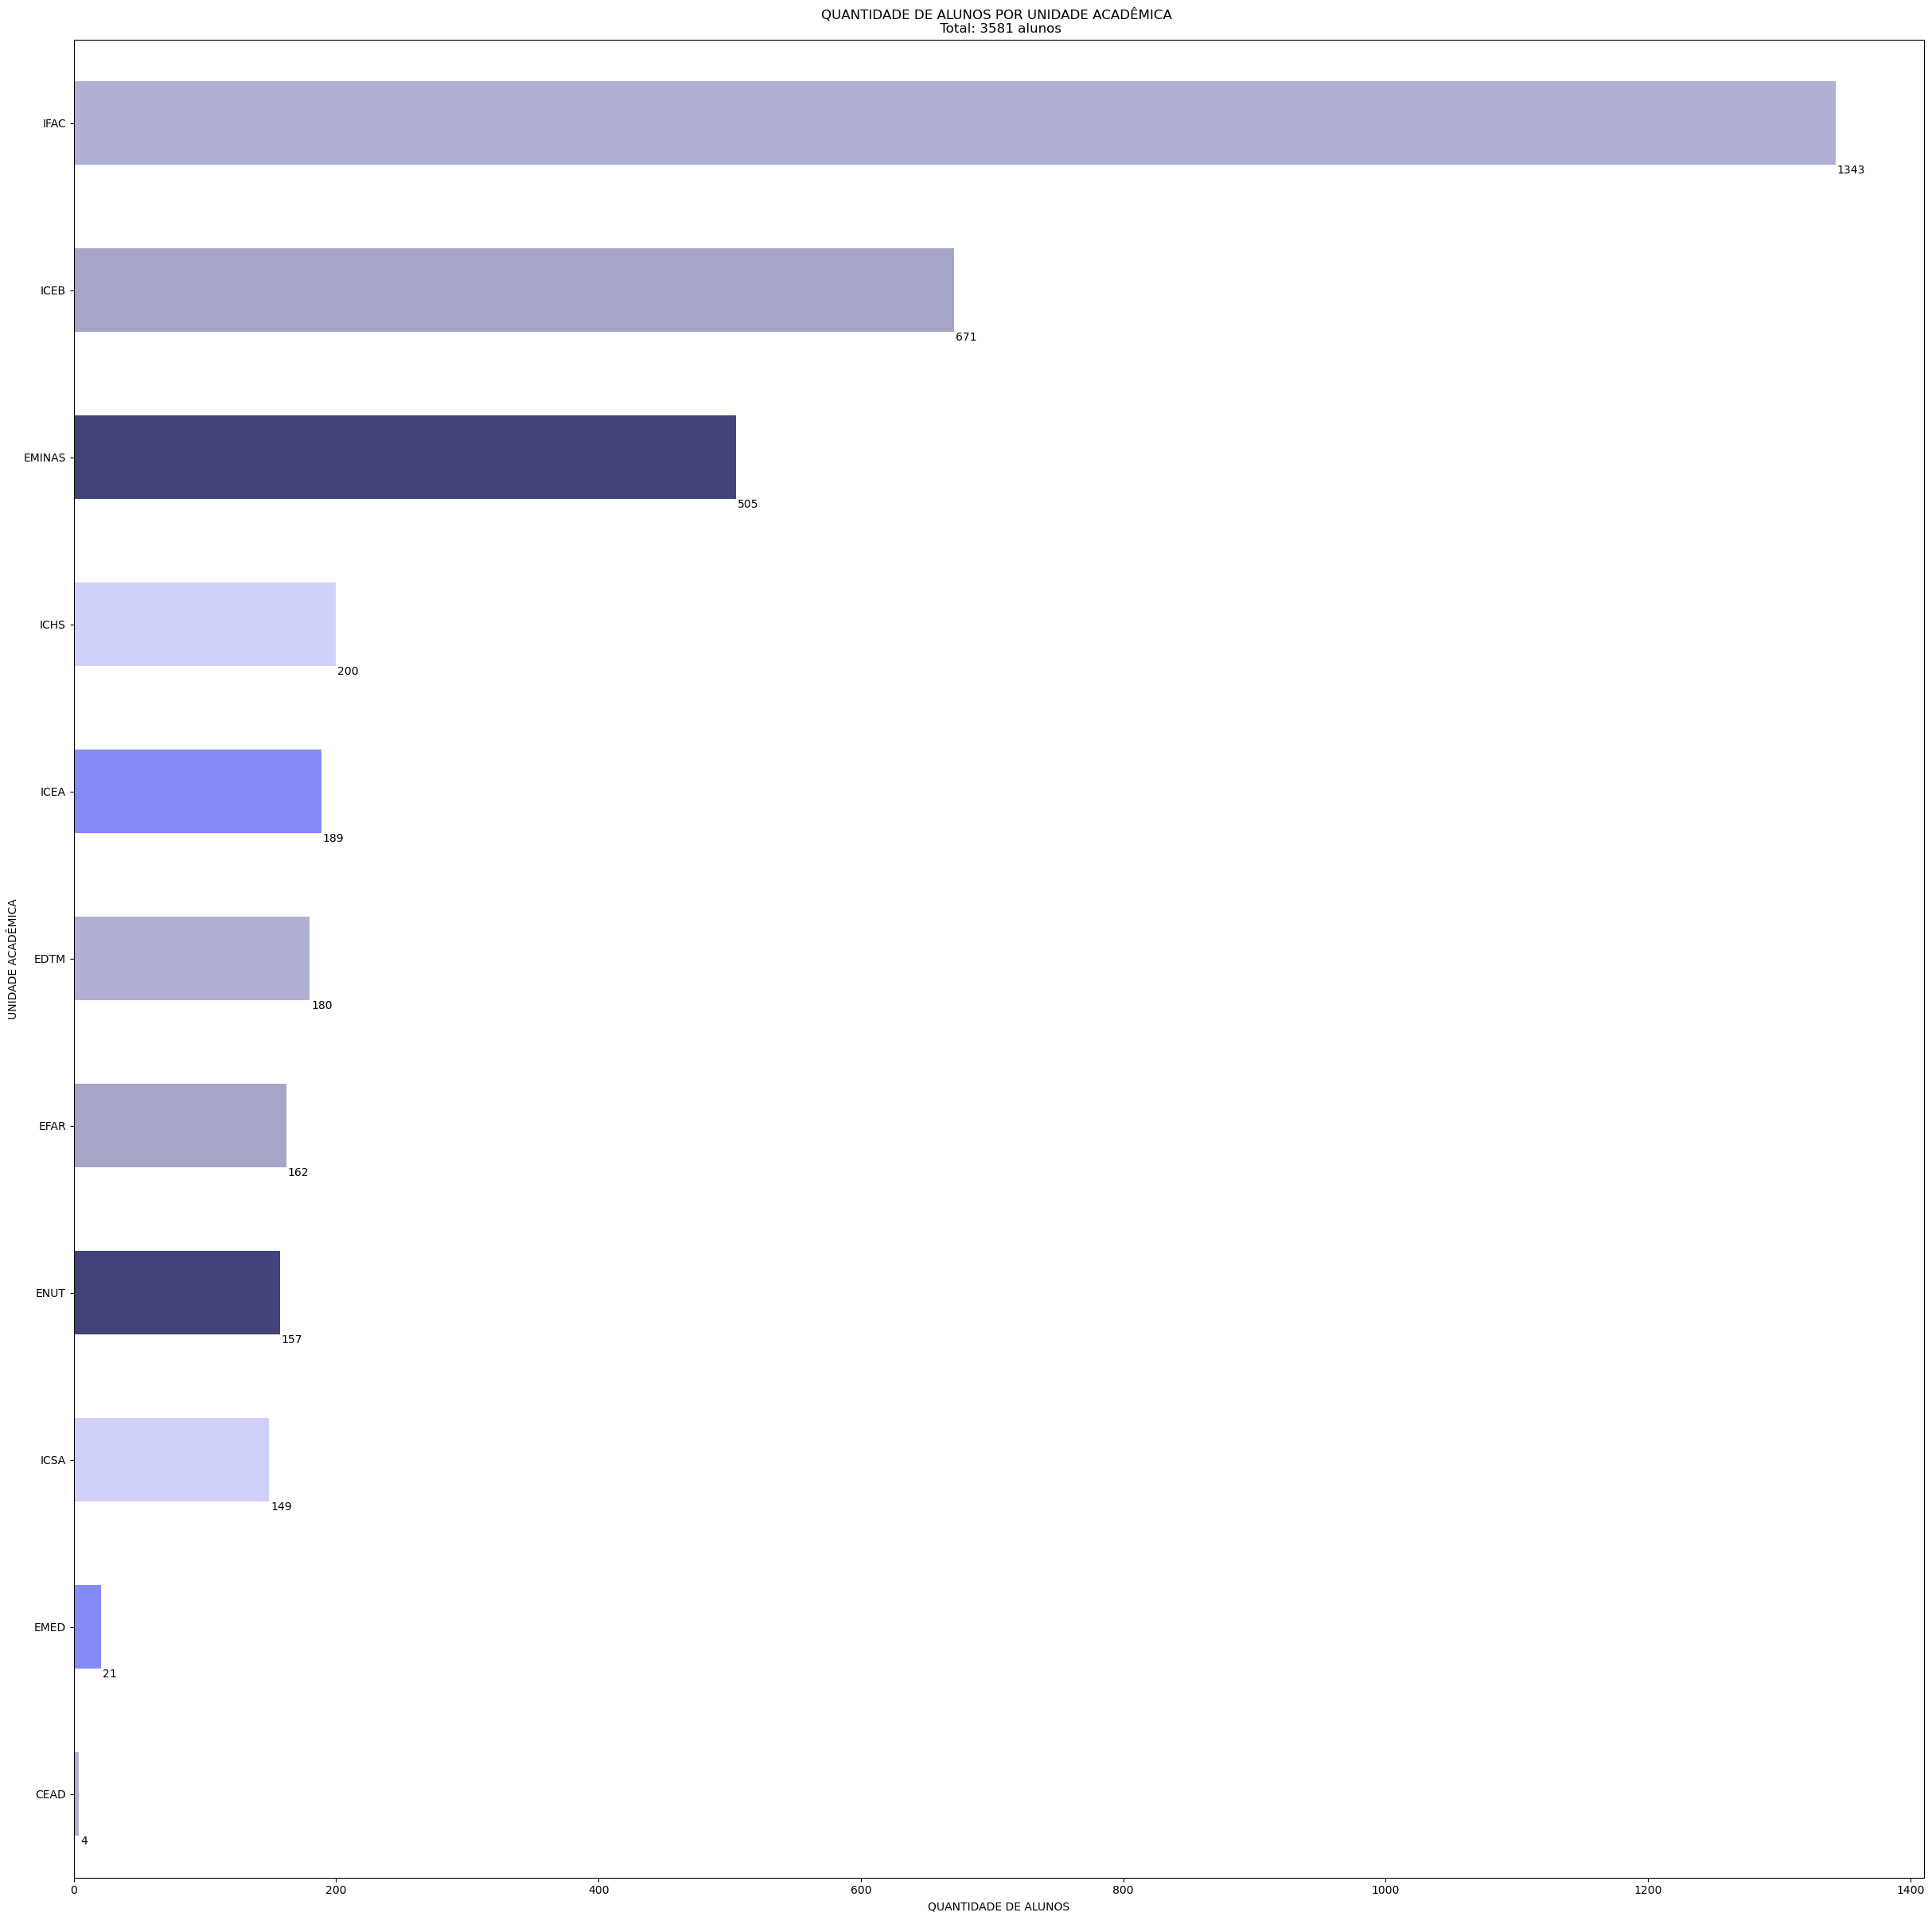

In [213]:
histograma = df.groupby('Unidade')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma.patches:
    b=p.get_bbox()
    histograma.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR UNIDADE ACADÊMICA \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.ylabel('UNIDADE ACADÊMICA')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

4. Quantos alunos de um determinado curso da UFOP fazem Iniciação Científica?

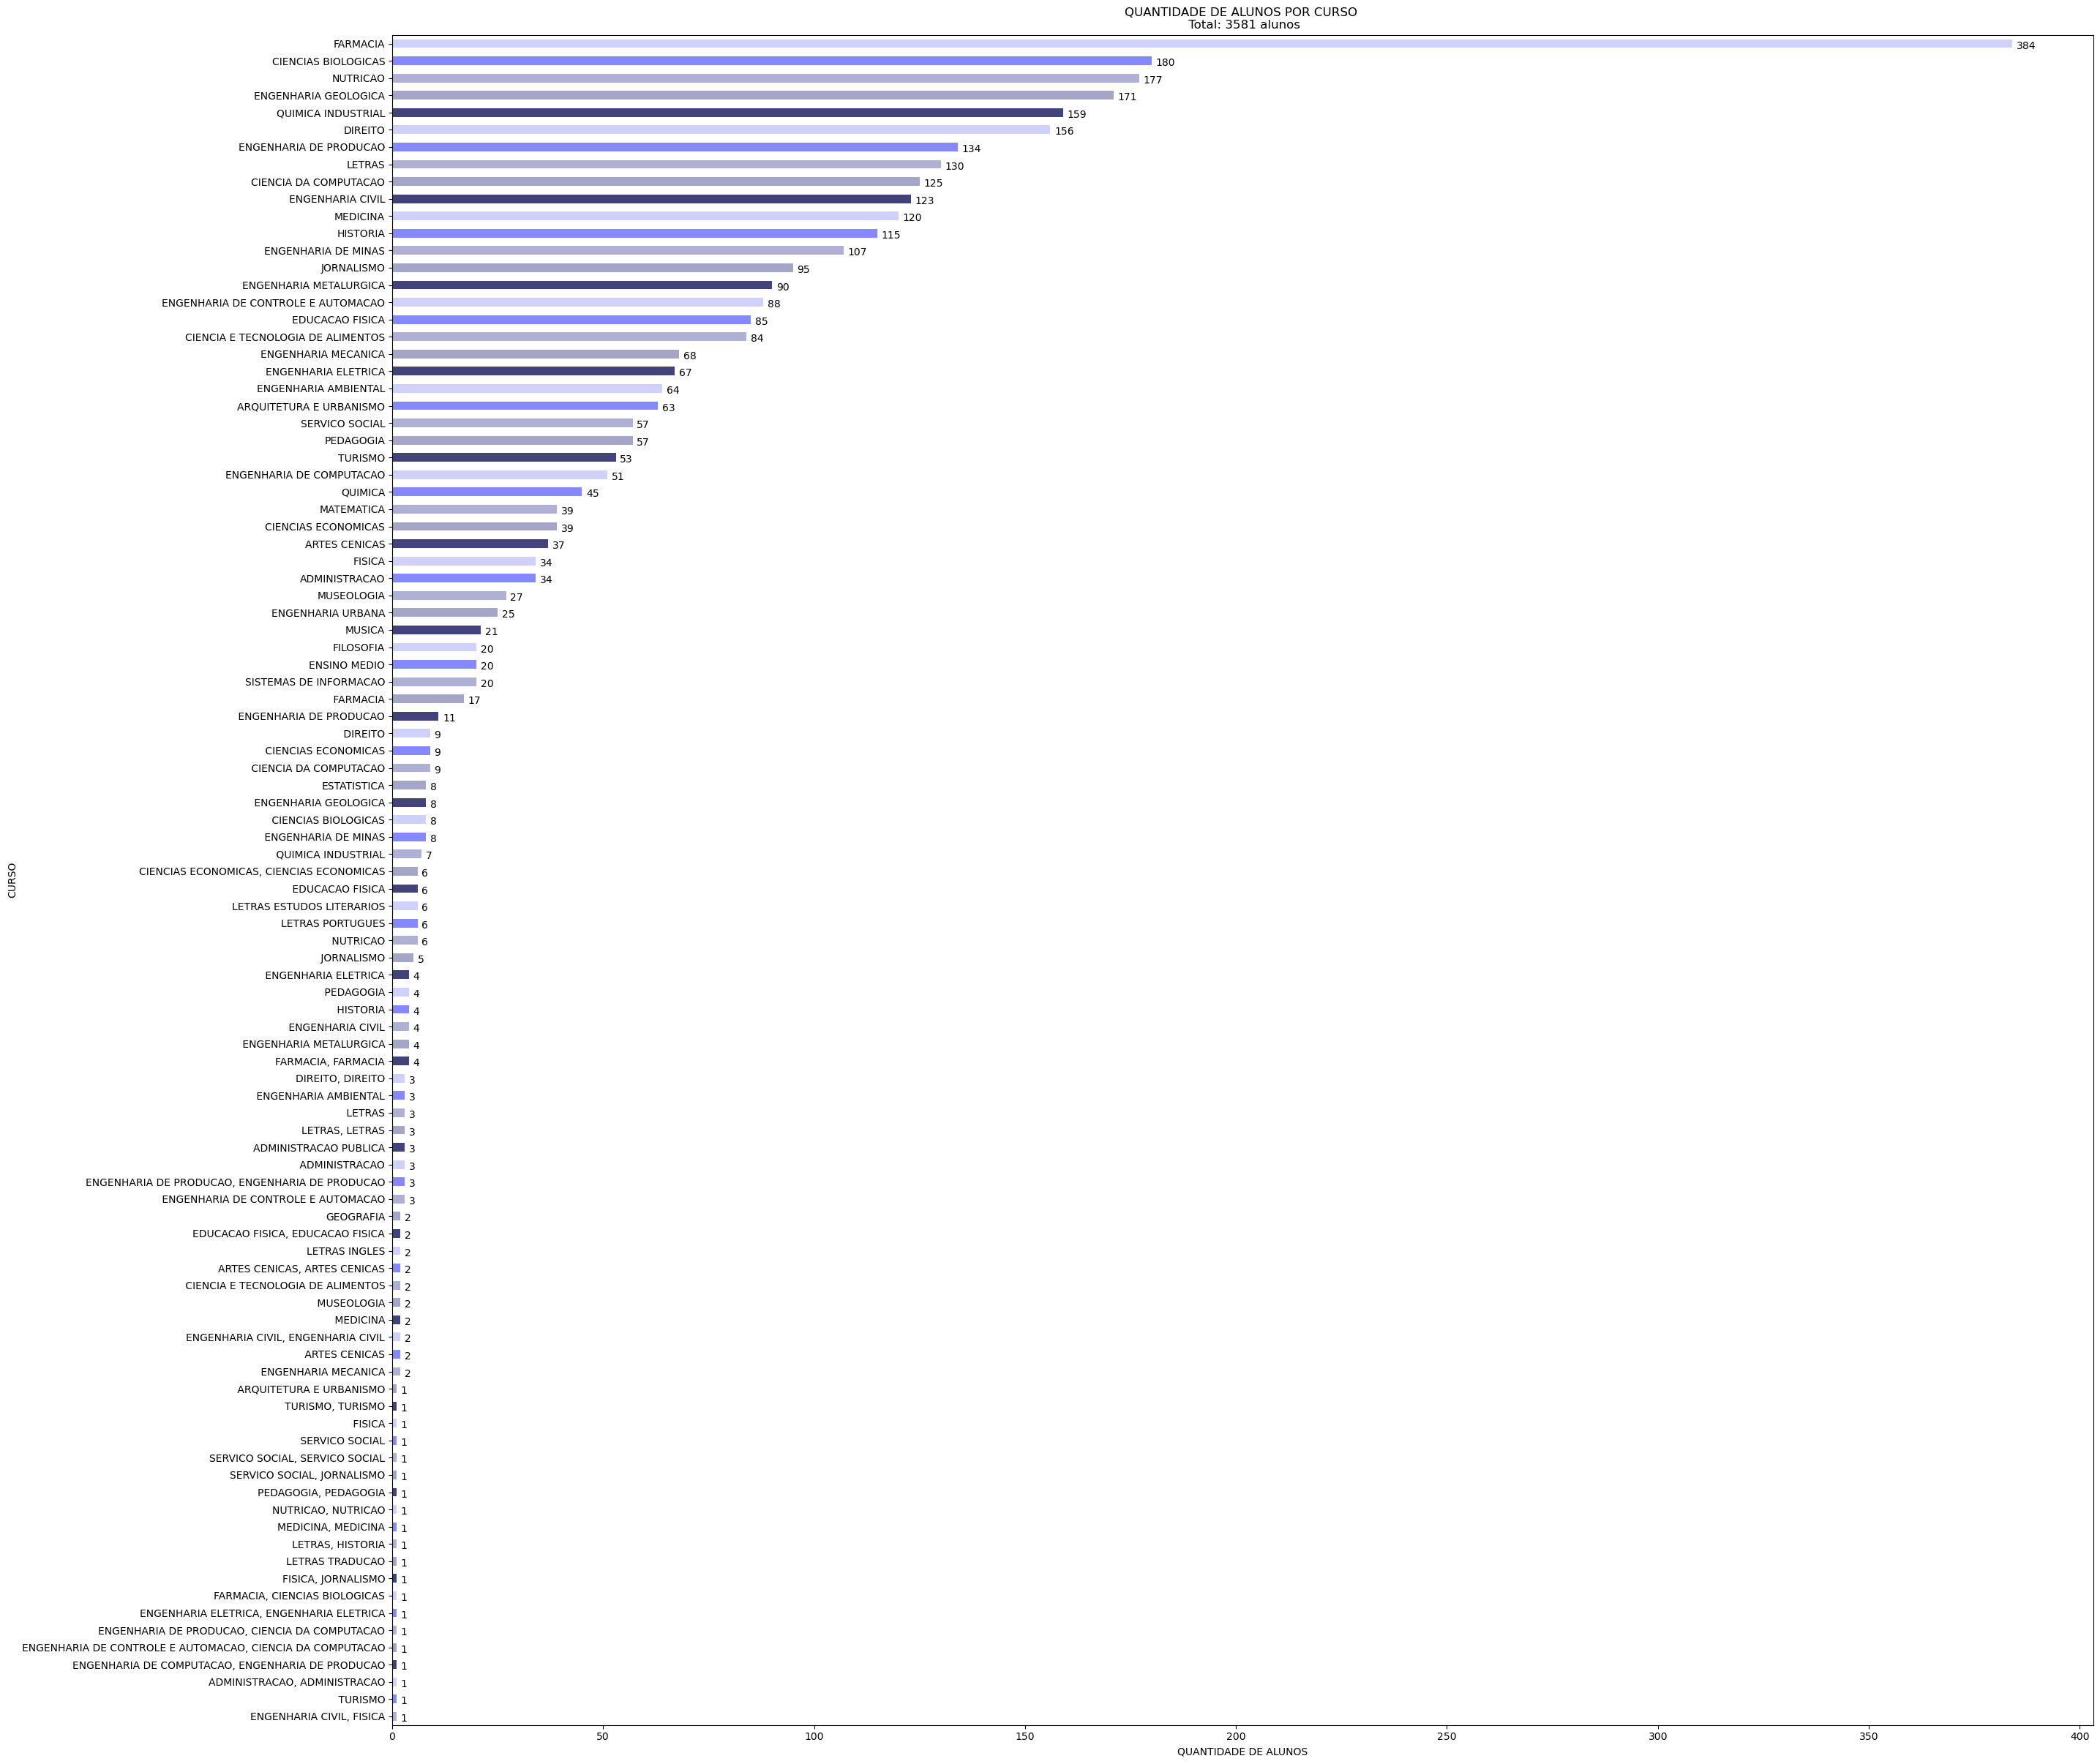

In [214]:
histograma = df.groupby('Curso')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma.patches:
    b=p.get_bbox()
    histograma.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR CURSO \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.ylabel('CURSO')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

Observação: o conjunto de dados apresenta a quantidade de cursos que o aluno se matriculou e registra se ele trancou algum período e retornou depois.

Quantos alunos por ano fazem Iniciação Científica na UFOP?

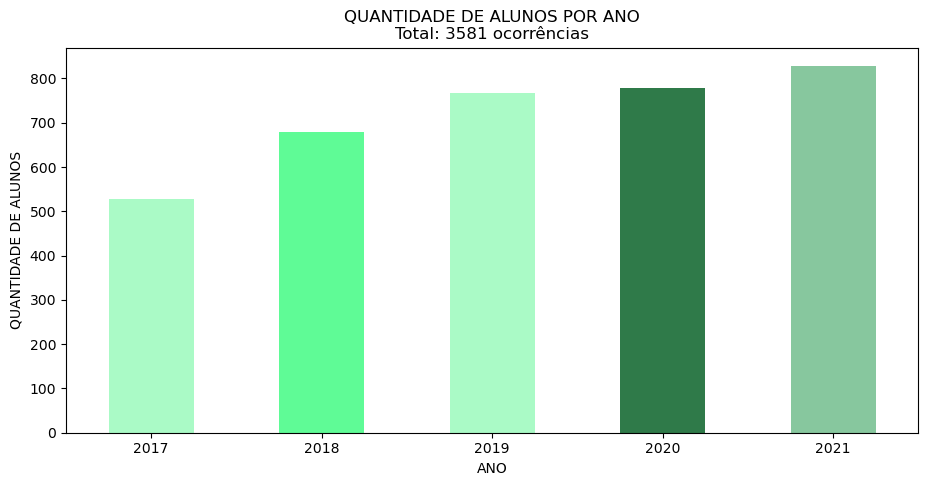

In [215]:
barras =  df.groupby('Ano')['Contagem'].sum().plot(kind='bar', color=random.choice(colors), figsize=(11,5))

plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR ANO\nTotal: ' + str(df['Contagem'].sum()) + ' ocorrências')
plt.xticks(rotation=0)
plt.show()

# Segundo Teste Piloto


Além do conjunto de dados "Bolsistas de Iniciação Científica", foi utilizada para tratamento de dados, limpeza e visualização a base de dados "Bolsa Renumerada".

No Portal de Dados Abertos da UFOP, existem várias planilhas e arquivos PDF organizados por ano. Diante dessa situação, foram unificados todas as planilhas e convertemos PDF para CSV para utilizarmos uma única planilha.

O campo "Razão Social" foi desconsiderado da planilha devido ao fato de ter nenhum registro nos conjuntos de dados escolhidos. As bases são de 2010 á 2022.

# Importando o Conjunto de Dados

In [216]:
path_um = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsa_renumerada.csv" #Endereço do csv para leitura

In [217]:
df_um = pd.read_csv(path_um, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [218]:
df_um

,nome,Código curso,descricao/bolsa,data_inicio,data_fim
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,AUXILIO MORADIA - JM,2013,2015.0
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,AUXILIO MORADIA - JM,2013,2013.0
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,AUXILIO MORADIA - JM,2013,2016.0
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0
...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,BOLSA PERMANENCIA,2016,2019.0
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,BOLSA PERMANENCIA,2016,2019.0
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,BOLSA PERMANENCIA,2016,2019.0
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,BOLSA PERMANENCIA,2016,2019.0


# Operações Básicas

In [219]:
df_um.dropna(inplace = True) # Descartando colunas com valor nulo para evitar erros

In [220]:
df_um.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34719 entries, 0 to 35172
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             34719 non-null  object 
 1   Código curso     34719 non-null  object 
 2   descricao/bolsa  34719 non-null  object 
 3   data_inicio      34719 non-null  int64  
 4   data_fim         34719 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


In [221]:
df_um.shape #Tamanho da base de dados: número de linhas e número de colunas

(34719, 5)

In [222]:
df_um.columns #Saber o nome das colunas

Index(['nome', 'Código curso', 'descricao/bolsa', 'data_inicio', 'data_fim'], dtype='object')

In [223]:
df_um.describe() #Estatistica Geral do dataframe

,data_inicio,data_fim
count,34719.000000,34719.000000
mean,2016.775512,2019.119013
std,10.047228,3.078978
min,212.000000,2009.000000
25%,2015.000000,2017.000000
50%,2017.000000,2020.000000
75%,2019.000000,2021.000000
max,2022.000000,2025.000000


In [224]:
df_um.tail() #Imprime as 5 ultimas linhas do Dataframe

,nome,Código curso,descricao/bolsa,data_inicio,data_fim
35168,CAROLINA PAMELA DA COSTA,MEDICINA,BOLSA PERMANENCIA,2016,2019.0
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,BOLSA PERMANENCIA,2016,2019.0
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,BOLSA PERMANENCIA,2016,2019.0
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,BOLSA PERMANENCIA,2016,2019.0
35172,DASAYEVE KAIQUE SOUZA DE OLIVEIRA XAVIER,ENGENHARIA DE COMPUTACAO,AUXILIO MORADIA - JM,2016,2020.0


In [225]:
df_um['data_inicio'].min() #menor data de inicio do dataframe

212

In [226]:
df_um['data_inicio'].max() #maior data de inicio do dataframe

2022

In [227]:
df_um['data_fim'].min() #menor data fim do dataframe

2009.0

In [228]:
df_um['data_fim'].max() #maior data fim do dataframe

2025.0

# Limpeza de Dados

In [229]:
#Inserindo coluna para contagem para facilitar nas análises
df_um['Contagem'] = 1

In [330]:
df_um.columns = ['Bolsista','Curso','Categoria da Bolsa','Data de Inicio','Data Fim','Contagem'] #Renomeando colunas

In [331]:
df_um

,Bolsista,Curso,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,MORADIA,2013,2015.0,1
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,MORADIA,2013,2013.0,1
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,MORADIA,2013,2016.0,1
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
...,...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,PERMANENCIA,2016,2019.0,1
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,PERMANENCIA,2016,2019.0,1
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,PERMANENCIA,2016,2019.0,1
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,PERMANENCIA,2016,2019.0,1


# Alterando Valores das Categorias de Bolsa

In [232]:
df_um['Categoria da Bolsa'].replace("AUXILIO MORADIA - JM", "MORADIA", inplace=True) # alterando valores da coluna

In [233]:
df_um['Categoria da Bolsa'].replace("AUXILIO MORADIA MEDIDA PROTETIVA", "MORADIA", inplace=True) # alterando valores da coluna

In [234]:
df_um['Categoria da Bolsa'].replace("BIDA-INCENTIVO DESENV. ACADEMICO", "BIDA", inplace=True) #alterando valores da coluna

In [235]:
df_um['Categoria da Bolsa'].replace("BOLSA AUXILIO MORADIA - REFORMA MA", "MORADIA", inplace=True) #alterando valores da coluna

In [236]:
df_um['Categoria da Bolsa'].replace("BOLSA COMPLEMENTO RU", "RU", inplace=True) #alterando valores da coluna

In [237]:
df_um['Categoria da Bolsa'].replace("BOLSA INTEGRAL RU", "RU", inplace=True) #alterando valores da coluna

In [238]:
df_um['Categoria da Bolsa'].replace("BOLSA PARCIAL RU", "RU", inplace=True) #alterando valores da coluna

In [239]:
df_um['Categoria da Bolsa'].replace("BOLSA PARCIAL RU COM TICKET", "RU", inplace=True) #alterando valores da coluna

In [240]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [241]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA MEC", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [242]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA QUILOMBOLA", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [243]:
df_um['Categoria da Bolsa'].replace("BOLSA PIDIC PRACE", "PIDIC", inplace=True) #alterando valores da coluna

In [244]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/NEI", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [245]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [246]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE - 15HS", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [247]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE - 20HS", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [248]:
df_um['Categoria da Bolsa'].replace("EXTENSÃƒO PRACE 2018", "EXTENSÃO", inplace=True) #alterando valores da coluna

In [249]:
df_um['Categoria da Bolsa'].replace("EXTENSÃO PRACE 2018", "EXTENSÃO", inplace=True) #alterando valores da coluna

In [250]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL AQUISI??O", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [251]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL AQUISI??O PCD", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [252]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL MANUTEN??O", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [253]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL MANUTEN??O PCD", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [254]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL PRACE BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [255]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL PRACE N?O BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [256]:
df_um['Categoria da Bolsa'].replace("INCLUSÃO DIGITAL PRACE BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [257]:
df_um['Categoria da Bolsa'].replace("INCLUSÃO DIGITAL PRACE NÃO BOLSISTA AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [258]:
df_um['Categoria da Bolsa'].replace("MONITORIA INCLUSIVA - NEI", "NEI", inplace=True) #alterando valores da coluna

In [259]:
df_um['Categoria da Bolsa'].replace("PRODESA - DESENV. SOCIAL E ACADEMICO", "PRODESA", inplace=True) #alterando valores da coluna

# Alterando Valores dos Cursos

In [260]:
df_um['Curso'].replace("SJM", "SISTEMAS DE INFORMACAO", inplace=True) #alterando valores da coluna

In [261]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [262]:
df_um['Curso'].replace("MED", "MEDICINA", inplace=True) #alterando valores da coluna

In [263]:
df_um['Curso'].replace("NUT", "NUTRICAO", inplace=True) #alterando valores da coluna

In [264]:
df_um['Curso'].replace("PED", "PEDAGOGIA", inplace=True) #alterando valores da coluna

In [265]:
df_um['Curso'].replace("TUR", "TURISMO", inplace=True) #alterando valores da coluna

In [266]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [267]:
df_um['Curso'].replace("ARQ", "ARQUITETURA", inplace=True) #alterando valores da coluna

In [268]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [269]:
df_um['Curso'].replace("ACB", "ARTES CENICAS", inplace=True) #alterando valores da coluna

In [270]:
df_um['Curso'].replace("ACL", "ARTES CENICAS", inplace=True) #alterando valores da coluna

In [271]:
df_um['Curso'].replace("COM", "CIENCIA DA COMPUTACAO", inplace=True) #alterando valores da coluna

In [272]:
df_um['Curso'].replace("ALI", "CIENCIA E TECNOLOGIA DE ALIMENTOS", inplace=True) #alterando valores da coluna

In [273]:
df_um['Curso'].replace("CBB", "CIENCIAS BIOLOGICAS", inplace=True) #alterando valores da coluna

In [274]:
df_um['Curso'].replace("CBL", "CIENCIAS BIOLOGICAS", inplace=True) #alterando valores da coluna

In [275]:
df_um['Curso'].replace("DIR", "DIREITO", inplace=True) #alterando valores da coluna

In [276]:
df_um['Curso'].replace("D04", "DIREITO", inplace=True) #alterando valores da coluna

In [277]:
df_um['Curso'].replace("QLI", "QUIMICA", inplace=True) #alterando valores da coluna

In [278]:
df_um['Curso'].replace("QUI", "QUIMICA INDUSTRIAL", inplace=True) #alterando valores da coluna

In [279]:
df_um['Curso'].replace("SER", "SERVICO SOCIAL", inplace=True) #alterando valores da coluna

In [280]:
df_um['Curso'].replace("ECO", "CIENCIAS ECONOMICAS", inplace=True) #alterando valores da coluna

In [281]:
df_um['Curso'].replace("EJM", "ENGENHARIA ELETRICA", inplace=True) #alterando valores da coluna

In [282]:
df_um['Curso'].replace("PJM", "ENGENHARIA DE PRODUCAO", inplace=True) #alterando valores da coluna

In [283]:
df_um['Curso'].replace("CJM", "ENGENHARIA DA COMPUTACAO", inplace=True) #alterando valores da coluna

In [284]:
df_um['Curso'].replace("GEO", "ENGENHARIA GEOLOGICA", inplace=True) #alterando valores da coluna

In [285]:
df_um['Curso'].replace("EST", "ESTATISTICA", inplace=True) #alterando valores da coluna

In [286]:
df_um['Curso'].replace("FAR", "FARMACIA", inplace=True) #alterando valores da coluna

In [287]:
df_um['Curso'].replace("PRO", "ENGENHARIA DE PRODUCAO", inplace=True) #alterando valores da coluna

In [288]:
df_um['Curso'].replace("JOR", "JORNALISMO", inplace=True) #alterando valores da coluna

In [289]:
df_um['Curso'].replace("URB", "ENGENHARIA URBANA", inplace=True) #alterando valores da coluna

In [290]:
df_um['Curso'].replace("HIB", "HISTORIA", inplace=True) #alterando valores da coluna

In [291]:
df_um['Curso'].replace("HIL", "HISTORIA", inplace=True) #alterando valores da coluna

In [292]:
df_um['Curso'].replace("MEC", "ENGENHARIA MECANICA", inplace=True) #alterando valores da coluna

In [293]:
df_um['Curso'].replace("MET", "ENGENHARIA METALURGICA", inplace=True) #alterando valores da coluna

In [294]:
df_um['Curso'].replace("MIN", "ENGENHARIA DE MINAS", inplace=True) #alterando valores da coluna

In [295]:
df_um['Curso'].replace("AMB", "ENGENHARIA AMBIENTAL", inplace=True) #alterando valores da coluna

In [296]:
df_um['Curso'].replace("AUT", "ENGENHARIA DE CONTROLE E AUTOMOCAO", inplace=True) #alterando valores da coluna

In [297]:
df_um['Curso'].replace("CIV", "ENGENHARIA CIVIL", inplace=True) #alterando valores da coluna

In [298]:
df_um['Curso'].replace("EFB", "EDUCACAO FISICA", inplace=True) #alterando valores da coluna

In [299]:
df_um['Curso'].replace("EFL", "EDUCACAO FISICA", inplace=True) #alterando valores da coluna

In [300]:
df_um['Curso'].replace("FLB", "FILOSOFIA", inplace=True) #alterando valores da coluna

In [301]:
df_um['Curso'].replace("FLL", "FILOSOFIA", inplace=True) #alterando valores da coluna

In [302]:
df_um['Curso'].replace("FSB", "FISICA", inplace=True) #alterando valores da coluna

In [303]:
df_um['Curso'].replace("FSL", "FISICA", inplace=True) #alterando valores da coluna

In [304]:
df_um['Curso'].replace("LTB", "LETRAS", inplace=True) #alterando valores da coluna

In [305]:
df_um['Curso'].replace("LTL", "LETRAS", inplace=True) #alterando valores da coluna

In [306]:
df_um['Curso'].replace("LTE", "LETRAS", inplace=True) #alterando valores da coluna

In [307]:
df_um['Curso'].replace("LTP", "LETRAS", inplace=True) #alterando valores da coluna

In [308]:
df_um['Curso'].replace("LTT", "LETRAS", inplace=True) #alterando valores da coluna

In [309]:
df_um['Curso'].replace("LTI", "LETRAS", inplace=True) #alterando valores da coluna

In [310]:
df_um['Curso'].replace("MTL", "MATEMATICA", inplace=True) #alterando valores da coluna

In [311]:
df_um['Curso'].replace("MTB", "MATEMATICA", inplace=True) #alterando valores da coluna

In [312]:
df_um['Curso'].replace("MUL", "MUSEOLOGIA", inplace=True) #alterando valores da coluna

In [313]:
df_um['Curso'].replace("MUS", "MUSICA", inplace=True) #alterando valores da coluna

In [332]:
df_um

,Bolsista,Curso,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,MORADIA,2013,2015.0,1
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,MORADIA,2013,2013.0,1
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,MORADIA,2013,2016.0,1
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
...,...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,PERMANENCIA,2016,2019.0,1
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,PERMANENCIA,2016,2019.0,1
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,PERMANENCIA,2016,2019.0,1
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,PERMANENCIA,2016,2019.0,1


# Visualização de Dados

# Questões Norteadoras

1. Qual a quantidade de alunos por categoria de bolsa?

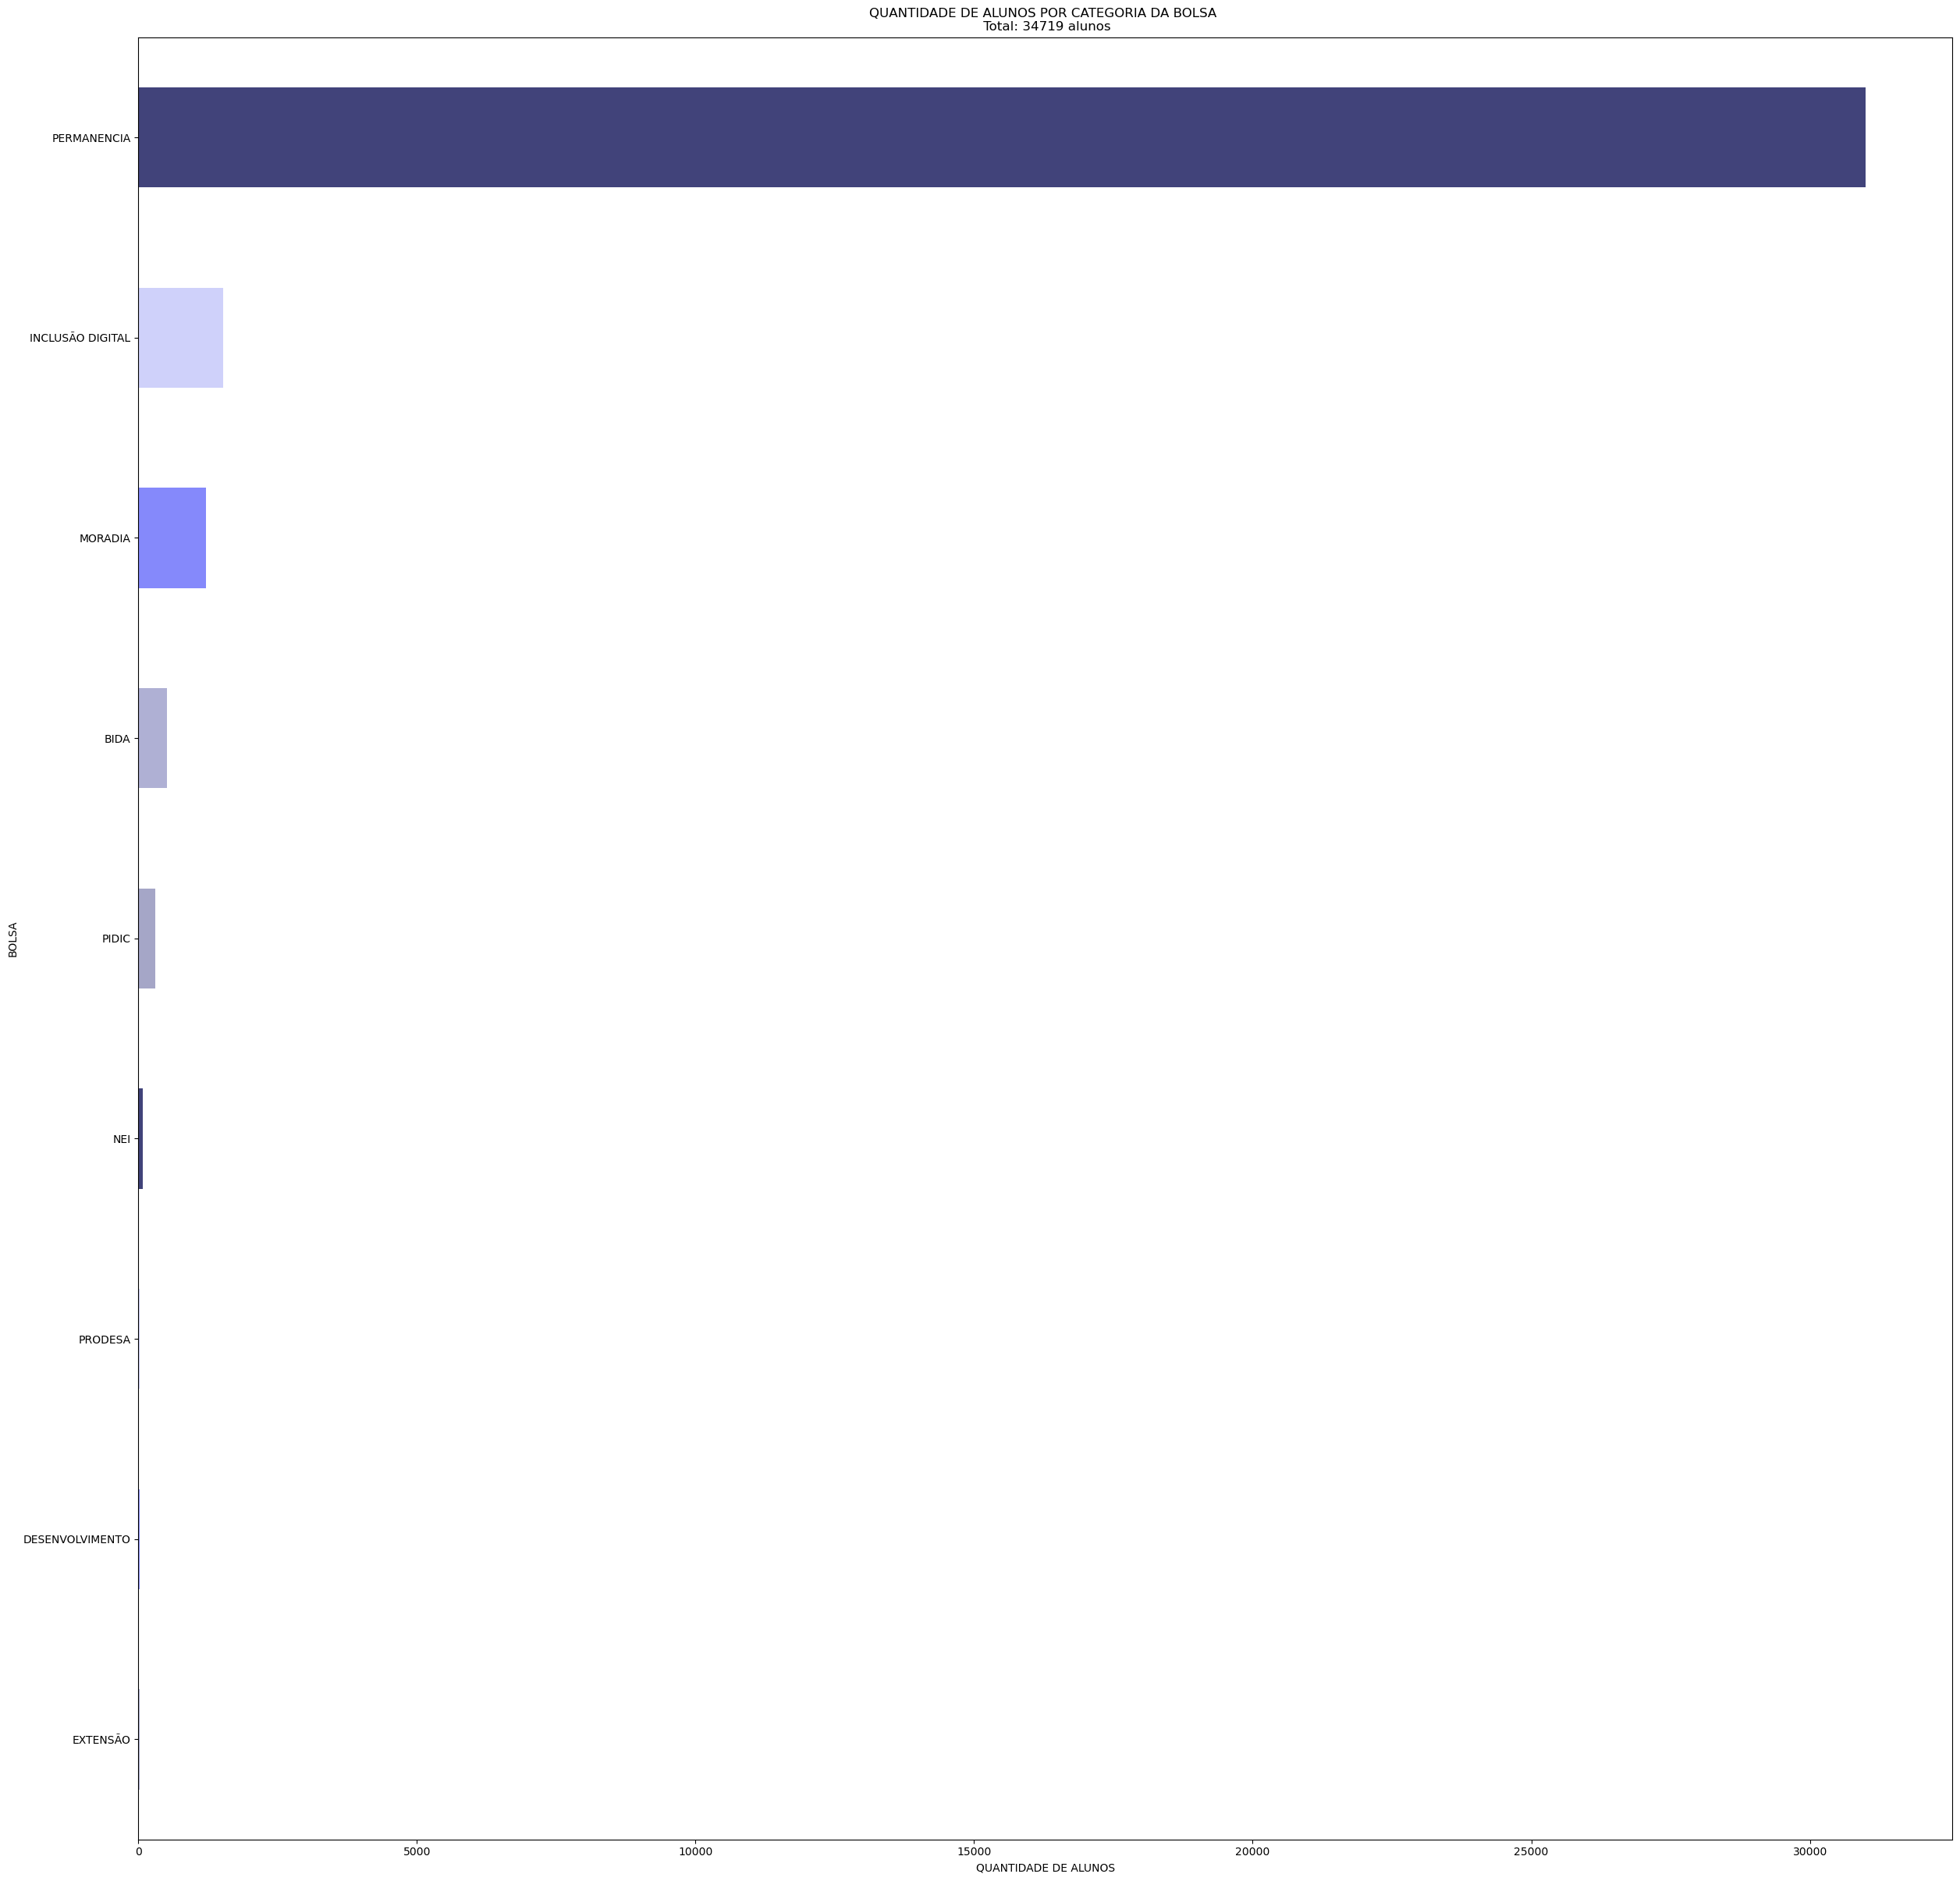

In [322]:
histograma_um = df_um.groupby('Categoria da Bolsa')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma_um.patches:
    b=p.get_bbox()
    histograma.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR CATEGORIA DA BOLSA \n Total: ' + str(df_um['Contagem'].sum()) + ' alunos')
plt.ylabel('BOLSA')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

2. Qual a progressão anual em relação a data de pedido de bolsas renumeradas?

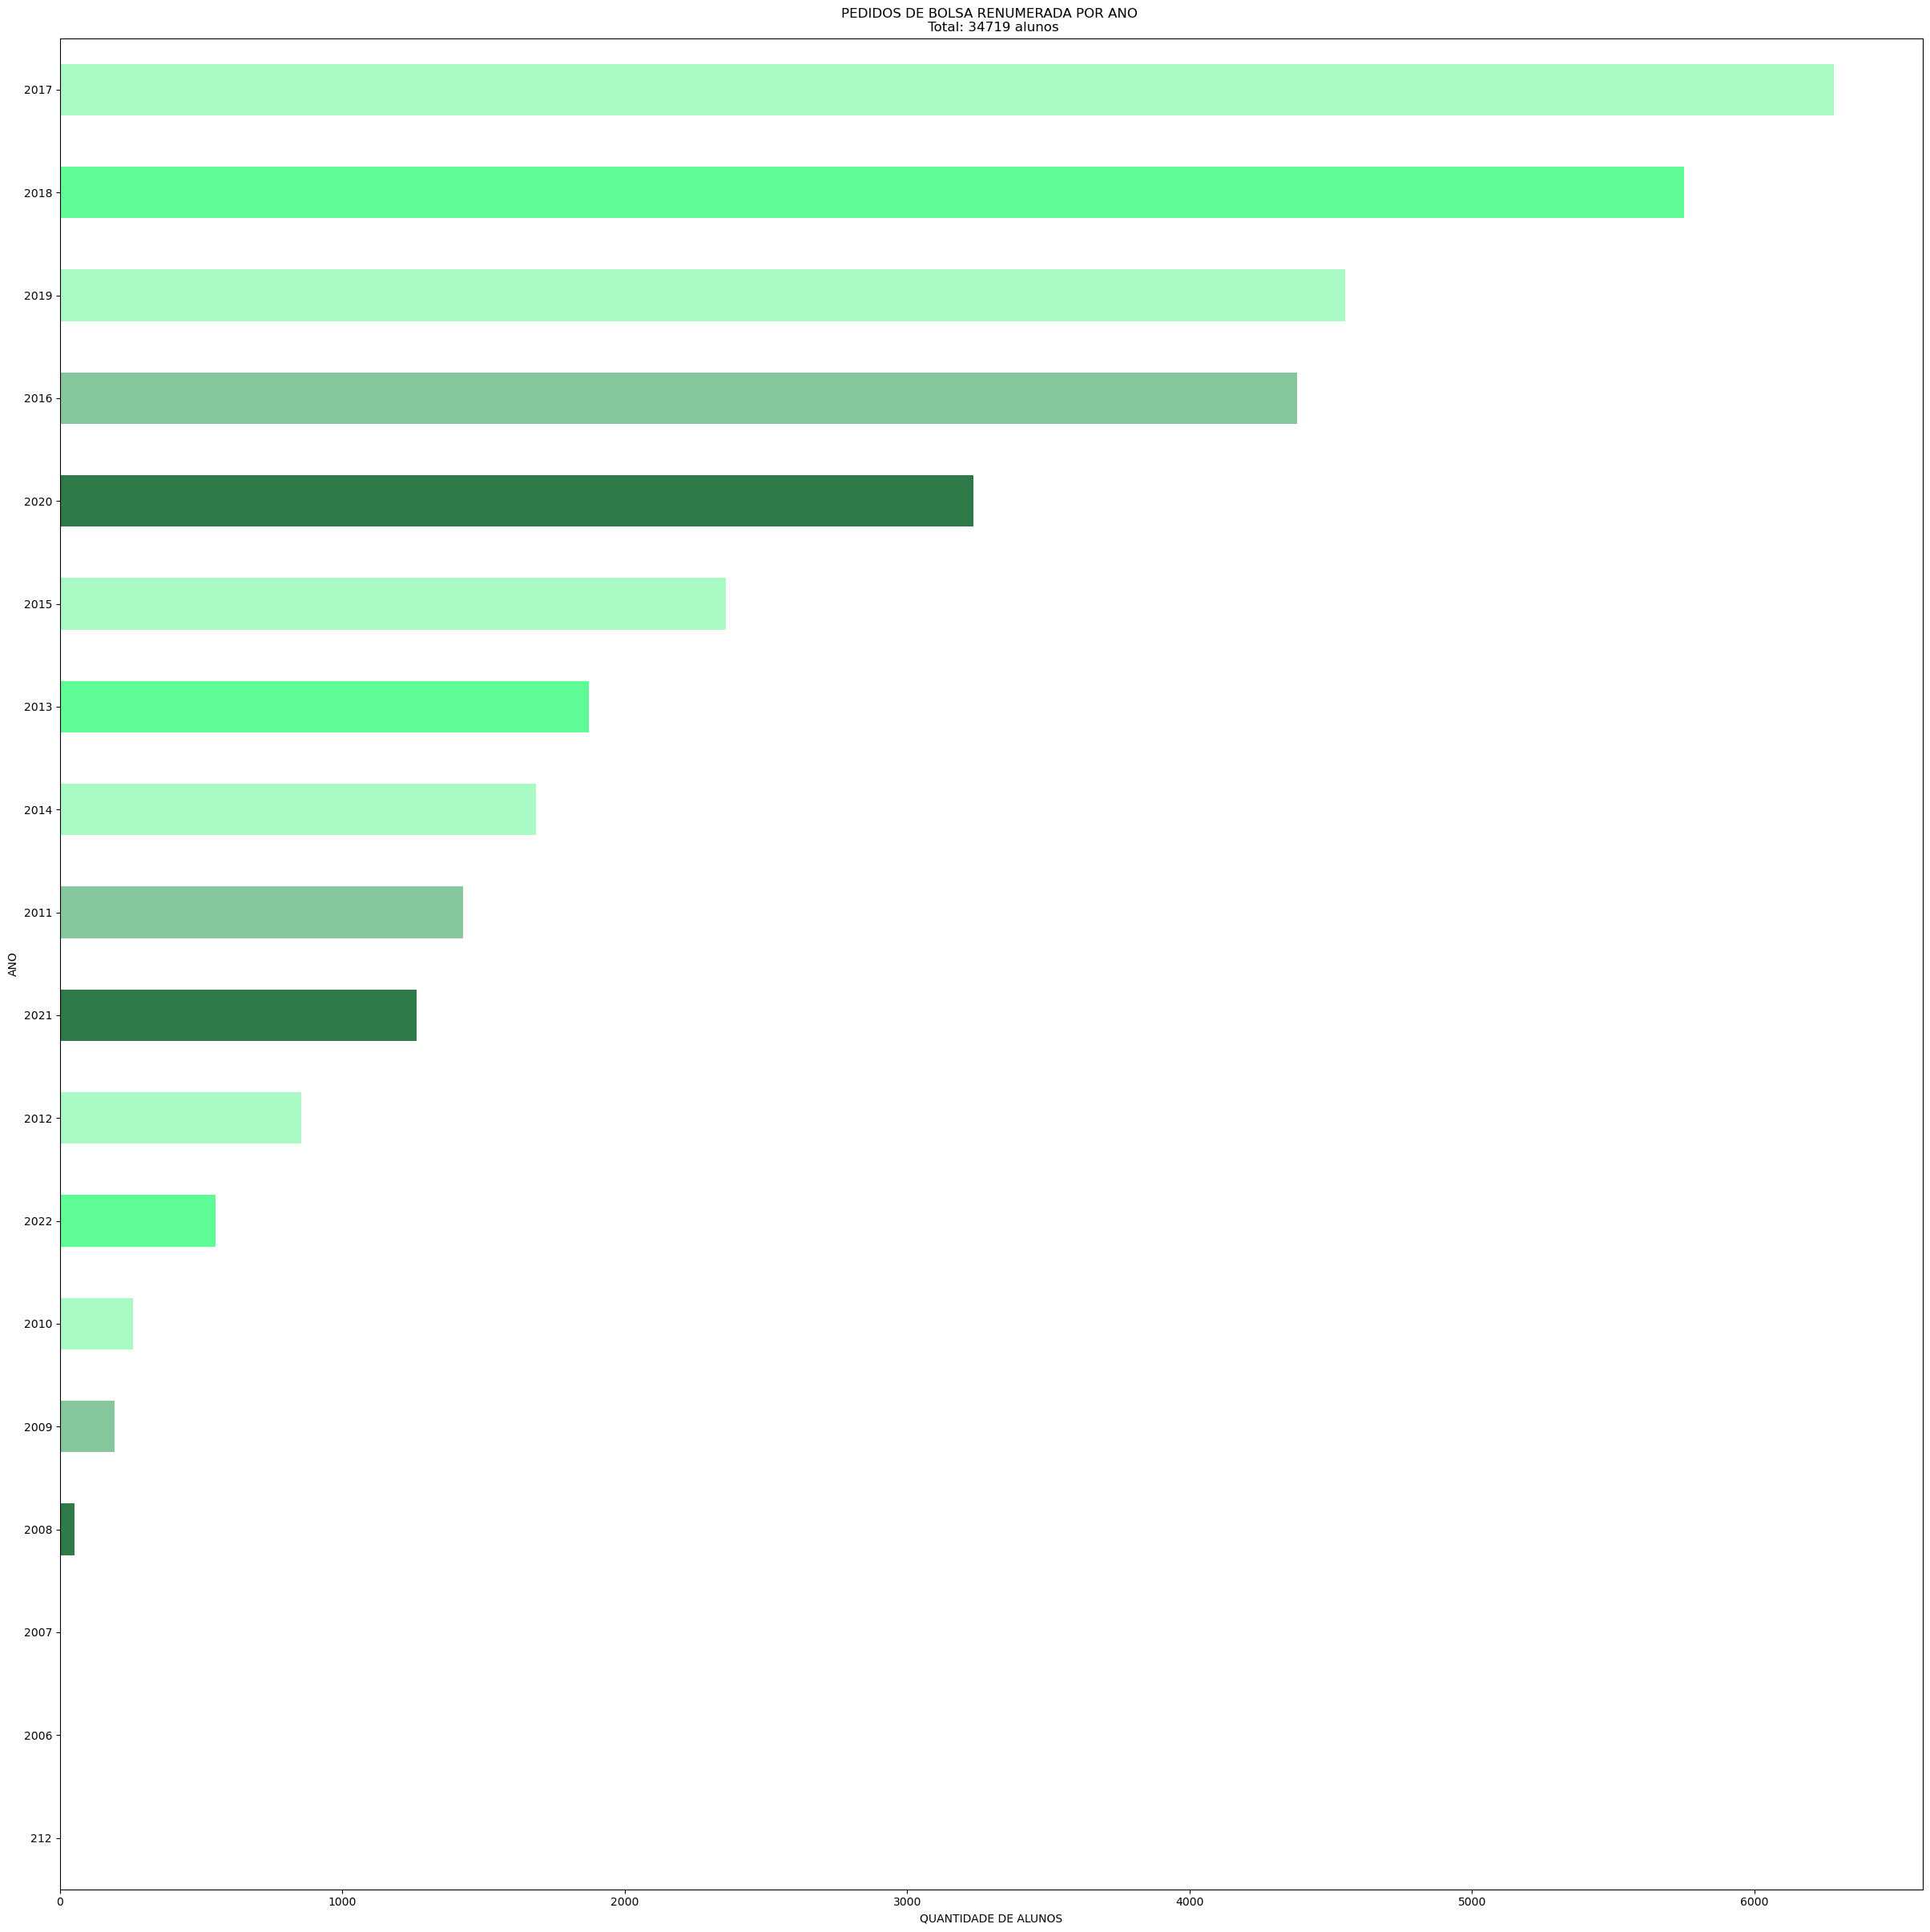

In [323]:
histograma_dois = df_um.groupby('Data de Inicio')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma_dois.patches:
    b=p.get_bbox()
    histograma.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('PEDIDOS DE BOLSA RENUMERADA POR ANO \n Total: ' + str(df_um['Contagem'].sum()) + ' alunos')
plt.ylabel('ANO')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

3. Qual a progressão anual em relação a data de encerramento de bolsas renumeradas?

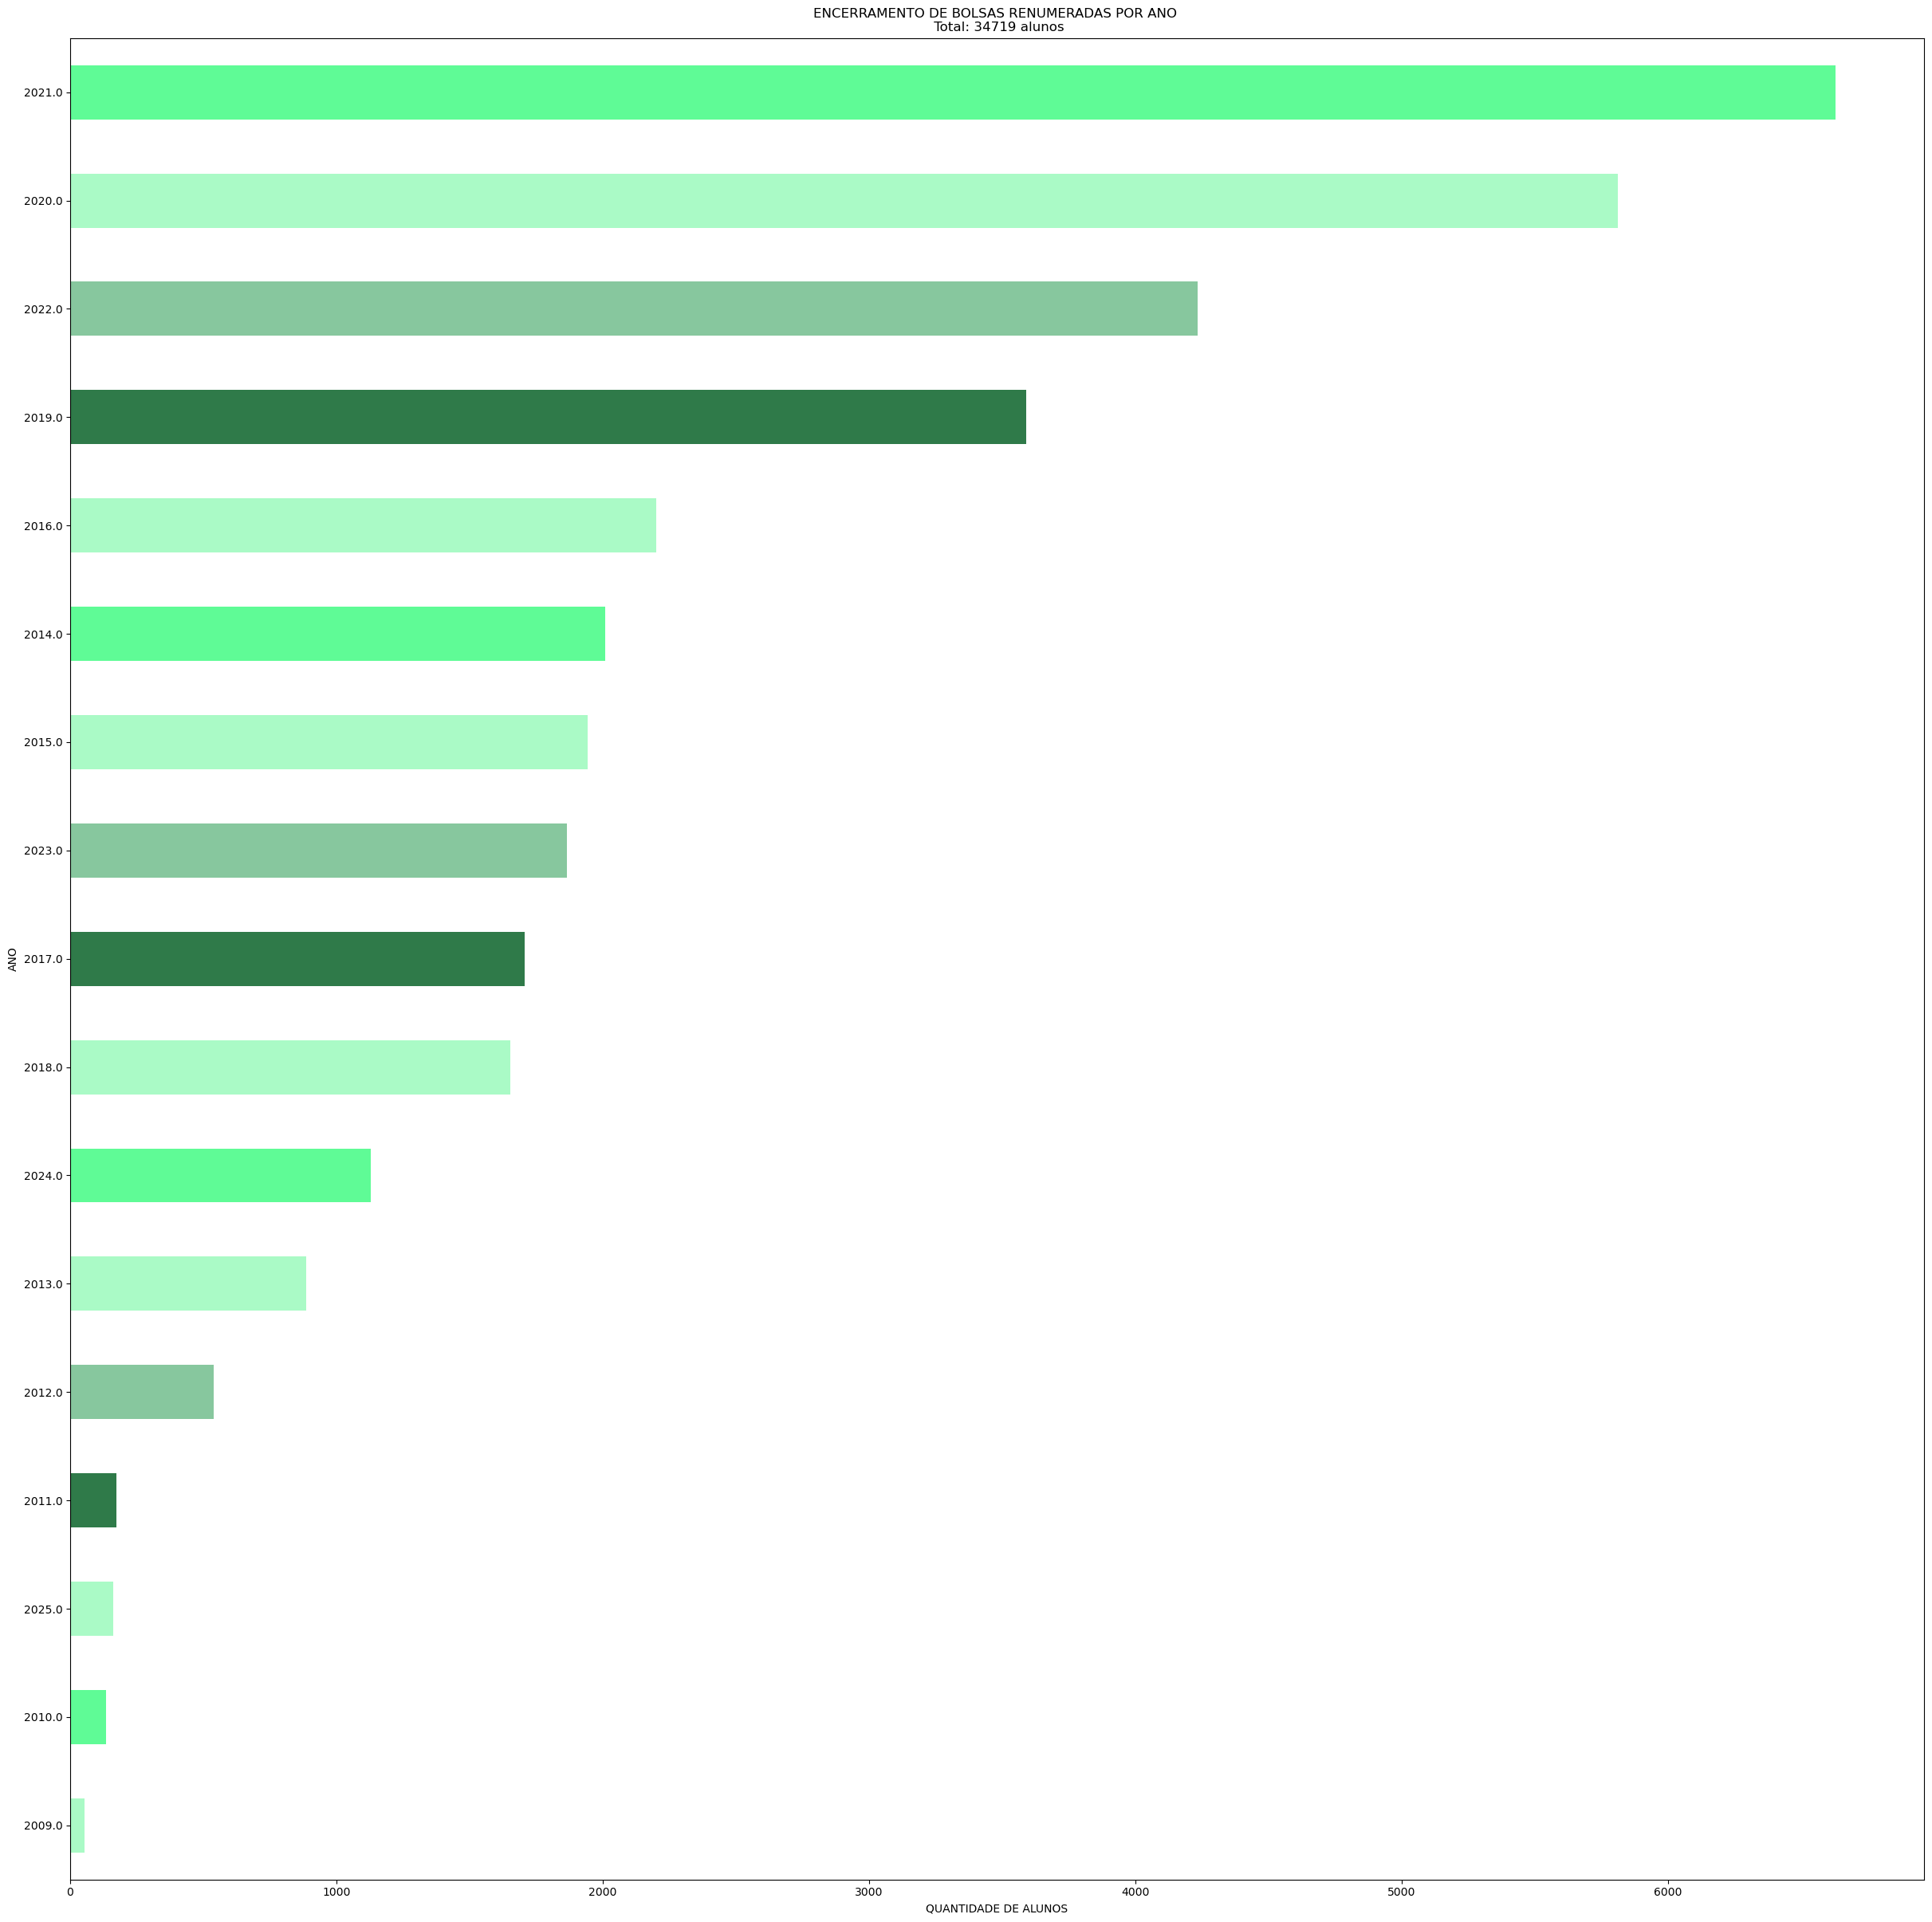

In [325]:
histograma_tres = df_um.groupby('Data Fim')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma_tres.patches:
    b=p.get_bbox()
    histograma.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('ENCERRAMENTO DE BOLSAS RENUMERADAS POR ANO \n Total: ' + str(df_um['Contagem'].sum()) + ' alunos')
plt.ylabel('ANO')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

# Cruzando os dois conjuntos de Dados

A manipulação de Conjunto de Dados é essencial em análises de Ciência de Dados para obter insights mais específicos e que consiga desenvolver novas estratégias e tomadas de decisão.

# Questões Norteadoras

1. Quais Bolsistas e Voluntários de IC que recebem bolsas renumeradas?

In [336]:
mista = pd.merge(df, df_um, on="Bolsista") #Função para coletar informações das duas csv usando o conceito de inner
display(mista)

,Bolsista,Curso_x,Ano,Departamento,Fomento,Tipo de Aluno,Contagem_x,Unidade,Curso_y,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem_y
0,AGUINALDO MEDEIROS BOLDRINI,HISTORIA,2017,DEHIS,CNPQ,BOLSISTA,1,IFAC,HISTORIA ...,PERMANENCIA,2014,2017.0,1
1,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA ...,PERMANENCIA,2014,2014.0,1
2,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA ...,PERMANENCIA,2014,2014.0,1
3,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA ...,PERMANENCIA,2017,2017.0,1
4,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA,PERMANENCIA,2014,2020.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8951,ALICE SILVEIRA DA SILVA,LETRAS PORTUGUES,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2020,2022.0,1
8952,ALICE SILVEIRA DA SILVA,LETRAS PORTUGUES,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2020,2022.0,1
8953,ALICE SILVEIRA DA SILVA,LETRAS PORTUGUES,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PIDIC,2018,2018.0,1
8954,ALICE SILVEIRA DA SILVA,LETRAS PORTUGUES,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2017,2019.0,1
